In [1]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv('tree.csv')

In [3]:
# Preview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [4]:
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [5]:
# Check for duplicate rows
data.duplicated().sum()

0

In [6]:
# Check for duplicate tree id
data.tree_id.value_counts().head()

2047      1
638877    1
626587    1
624538    1
630681    1
Name: tree_id, dtype: int64

In [7]:
# Check for missing values
data.isnull().sum().sort_values(ascending=False)

problems            31664
spc_common          31619
spc_latin           31619
health              31616
sidewalk            31616
guards              31616
steward             31615
bin                  9559
bbl                  9559
council district     6519
census tract         6519
status                  0
curb_loc                0
stump_diam              0
trnk_other              0
tree_dbh                0
created_at              0
block_id                0
user_type               0
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
brch_shoe               0
brch_light              0
brch_other              0
y_sp                    0
x_sp                    0
longitude               0
latitude                0
state                   0
boro_ct                 0
nta_name                0
nta                     0
st_senate               0
st_assem                0
cncldist                0
borough     

In [8]:
# Explore possible target variables
data.status.unique(), data.health.unique()

(array(['Alive', 'Stump', 'Dead'], dtype=object),
 array(['Fair', 'Good', 'Poor', nan], dtype=object))

In [9]:
# Health values are only recorded for trees with the status of 'Alive'
data.groupby('status').health.value_counts()

status  health
Alive   Good      528850
        Fair       96504
        Poor       26818
Name: health, dtype: int64

In [10]:
# Check status for null health values
data[data.health.isnull()].status.value_counts()

Stump    17654
Dead     13961
Alive        1
Name: status, dtype: int64

In [11]:
# Drop one 'Alive' record
data = data[~((data.health.isnull()) & (data.status=='Alive'))]

In [12]:
# Fill remaining null health value with status
data.health.fillna(data.status, inplace=True)

In [13]:
# Drop status column
data.drop('status', axis=1, inplace=True)

In [14]:
# Check target variable 'health'
data.health.value_counts()

Good     528850
Fair      96504
Poor      26818
Stump     17654
Dead      13961
Name: health, dtype: int64

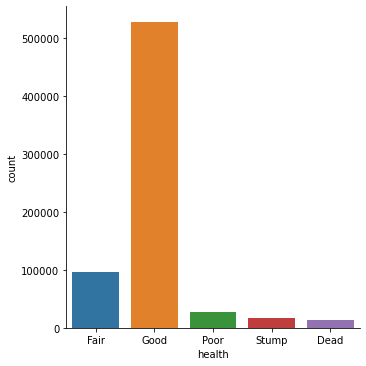

In [15]:
sns.catplot(x='health', kind='count', data=data)

In [16]:
# Look at data types
data.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct               int64
state               

In [17]:
# Change date type
data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%Y')

In [18]:
# Set tree_id as index
data = data.set_index('tree_id')

In [19]:
# Explore numeric variables
data.select_dtypes(['int64','float64']).describe()
# Should I change the dtypes of non-numeric variables (ex. id #s, geo codes)?

,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683787.000000,683787.000000,683787.000000,683787.000000,683787.000000,683787.000000,683787.000000,683787.000000,683787.000000,6.837870e+05,683787.000000,683787.000000,6.837870e+05,683787.000000,677268.000000,677268.000000,6.742280e+05,6.742280e+05
mean,313792.951134,11.279780,0.432464,10916.246932,343.505170,3.358498,29.943150,50.791567,20.615777,3.404912e+06,40.701262,-73.924059,1.005280e+06,194798.505906,30.027299,11957.355364,3.495437e+06,3.413411e+09
std,114839.045602,8.723047,3.290243,651.553426,115.740525,1.166745,14.328519,18.966529,7.390848,1.175863e+06,0.090311,0.123583,3.428494e+04,32902.016522,14.301704,30745.760632,1.193274e+06,1.174891e+09
min,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631929,-73.980500,9.896579e+05,169515.207600,19.000000,202.000000,3.031990e+06,3.011240e+09
50%,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.258600,30.000000,516.000000,4.020351e+06,4.008560e+09
75%,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834909,1.029991e+06,217019.660200,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


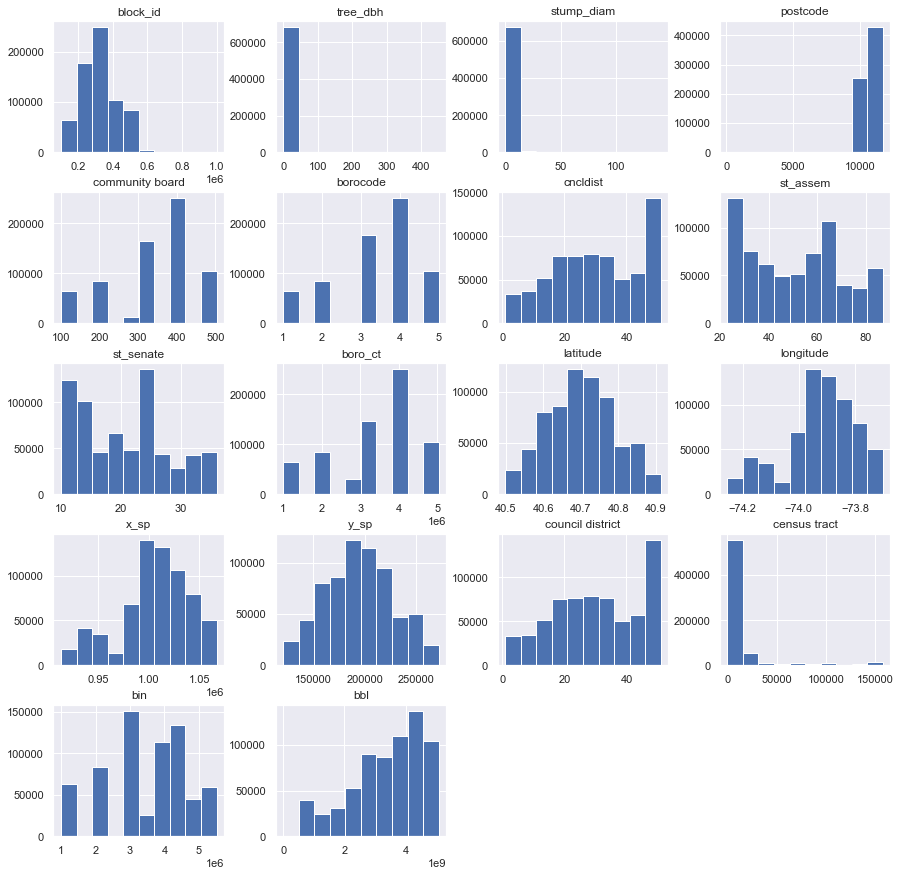

In [20]:
# Look at distribution of numeric variables
sns.set()
data.select_dtypes(['int64','float64']).hist(figsize= (15,15))
plt.show();

In [21]:
# Explore other variables
data.select_dtypes('object').describe()

,curb_loc,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,...,trnk_other,brch_light,brch_shoe,brch_other,address,zip_city,borough,nta,nta_name,state
count,683787,683787,652168,652168,652172,652171,652171,683787,652123,683787,...,683787,683787,683787,683787,683787,683787,683787,683787,683787,683787
unique,2,5,132,132,4,4,2,3,232,2,...,2,2,2,2,408701,48,5,188,188,1
top,OnCurb,Good,Platanus x acerifolia,London planetree,None,None,NoDamage,TreesCount Staff,None,No,...,No,No,No,No,106 CROSS BAY BOULEVARD,Brooklyn,Queens,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,New York
freq,656895,528850,87014,87014,487822,572305,464978,296283,426279,543788,...,651214,621422,683376,659432,262,177300,250551,12969,12969,683787


In [22]:
# Drop state (same value for all rows)
data.drop('state', inplace=True, axis=1)

In [23]:
# Documentation notes that diameter for stumps was recorded in a separate column from other dead or alive trees
print(data[data.stump_diam!=0].health.value_counts())
print(data[data.stump_diam==0].health.value_counts())
#Should I try to combine columns or drop stump records?

Stump    17654
Name: health, dtype: int64
Good    528850
Fair     96504
Poor     26818
Dead     13961
Name: health, dtype: int64
